# Can test Kaggle up to 5 times a day 

#Feature Extraction

The aim of this jupyter notebook is to build upon the data file extraction made by Amanda. The main idea is to use pre
existing libraries susch as *scikit-learn*. The main goal is to learn the basics, and train a machine learning model
quickly and easily.

In [30]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline


from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [31]:
def dt64_to_float(dt64):
     year = dt64.astype('M8[Y]')
     days = (dt64 - year).astype('timedelta64[D]')
     year_next = year + np.timedelta64(1, 'Y')
     days_of_year = (year_next.astype('M8[D]') - year.astype('M8[D]')).astype('timedelta64[D]')
     dt_float = 1970 + year.astype(float) + days / (days_of_year)
     return dt_float

In [32]:
train_a = pd.read_parquet('A/train_targets.parquet')
train_b = pd.read_parquet('B/train_targets.parquet')
train_c = pd.read_parquet('C/train_targets.parquet')


X_train_estimated_a = pd.read_parquet('A/X_train_estimated.parquet')
X_train_estimated_b = pd.read_parquet('B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('C/X_train_estimated.parquet')

X_train_observed_a = pd.read_parquet('A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('C/X_train_observed.parquet')

X_test_estimated_a = pd.read_parquet('A/X_test_estimated.parquet')
X_test_estimated_b = pd.read_parquet('B/X_test_estimated.parquet')
X_test_estimated_c = pd.read_parquet('C/X_test_estimated.parquet')

In [33]:
X_train_estimated_a = X_train_estimated_a.drop(["date_calc"],axis=1)
X_train_estimated_b = X_train_estimated_b.drop(["date_calc"],axis=1)
X_train_estimated_c = X_train_estimated_c.drop(["date_calc"],axis=1)

In [ ]:
# merge macher colloner
# concatinate stacker ting
# Må ikke bruke est -- teste lokalt og tune parametre
# nyttig å sotere, ikke så viktig her.
train_c_all = pd.merge(train_a, X_train_observed_c, on=['time'], how='left') ##left dropper rader som ikke finens i train_a



In [34]:
# If changing original variable -- only run once
X_total_a = pd.concat([X_train_observed_a,X_train_estimated_a], axis = 0)
X_total_b = pd.concat([X_train_observed_b,X_train_estimated_b], axis = 0)
X_total_c = pd.concat([X_train_observed_c,X_train_estimated_c], axis = 0)

# train_c = train_c.dropna(columns=['time'])

# train_c = train_c[train_c['pv_measurement'].isna() == 0] # fjerner alle colloner med nan
# X_total_c = X_total_c[train_c['pv_measurement'].isna() == 0] # fjerner alle colloner med nan

# X_a, y_a = data_length_matching(X_total_a, train_a) # beholder gammel index
# X_b, y_b = data_length_matching(X_total_b, train_b) # beholder gammel index
X_c, y_c = data_length_matching(X_total_c, train_c) # beholder gammel index


# y_c = y_c[y_c['pv_measurement'].isna() == 0] # fjerner alle colloner med nan
X_c = X_c[y_c['pv_measurement'].isna() == 0] # fjerner alle colloner med nan
y_c = y_c.dropna(supset=['pv_measurement']) # fjerner alle Nan collonene



# X_all = pd.concat([X_a,X_b,X_c], axis = 0)
# y_all = pd.concat([y_a,y_b,y_c], axis = 0)
# y_all = pd.concat([train_a,train_b,train_c], axis = 0) 

# X = X.reset_index(drop=True)
# y = y.reset_index(drop=True)

# X['date_forecast'] = dt64_to_float(X['date_forecast'].to_numpy())



If True same length and time stamps
True
32130 32130


C:\Users\amand\AppData\Local\Temp\ipykernel_24396\3396169784.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_c = X_c[y_c['pv_measurement'].isna() == 0] # fjerner alle colloner med nan


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

<Axes: title={'center': 'Train/Test A'}, xlabel='time'>

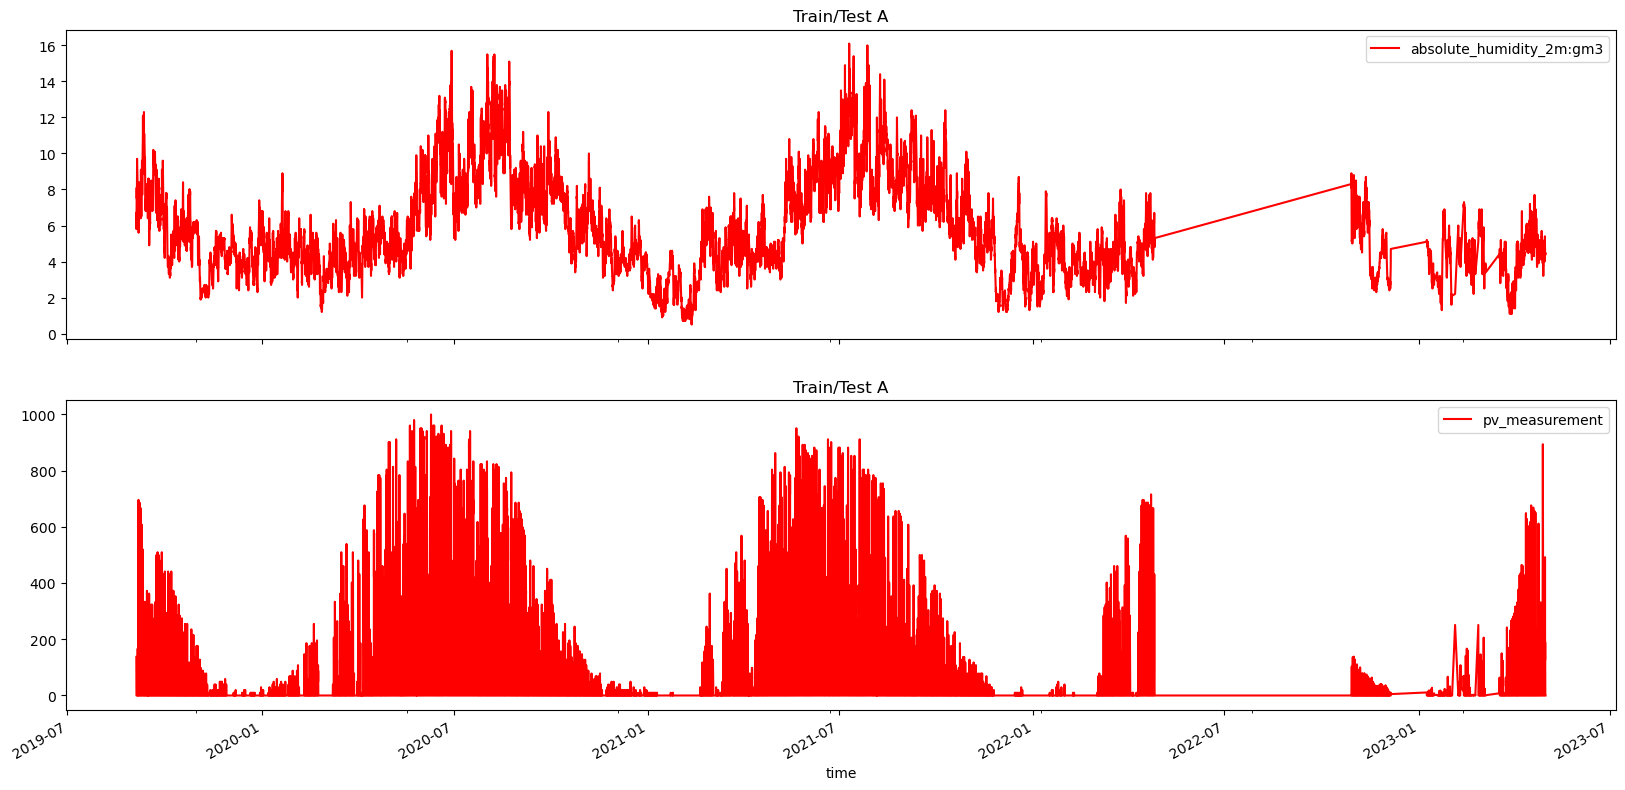

In [ ]:
# Plotting a single feature
fig, axs = plt.subplots(2, 1, figsize=(20, 10), sharex=True)
feature_name = 'absolute_humidity_2m:gm3'
X_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='red')
y_c[['time', 'pv_measurement']].set_index('time').plot(ax=axs[1], title='Train/Test A', color='red')



### 1.13.1. Removing features with low variance
#+====================================================================================================================+
#| Additional idea: Notice that time of day parameters will probably be provided... Fitting this to a location might  |
#| give us an edge needed to fit a better algorithm for each location...                                              |
#+====================================================================================================================+


This is something 
Use some of scikit learn feature extraction functionality.

* VarianceThreshold

* SelectKBest

* Tree-based feature selection

* Try implementing this into: Pipeline (1.13.6.)

In [ ]:
# y['time'] = dt64_to_float(y['time'].to_numpy())
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

# Get the mask of selected features (True for selected, False for removed)
selected_features_mask = sel.get_support()

# Get the names of removed features
removed_features = [feature for feature, keep in zip(X.columns, selected_features_mask) if not keep]

# Print the names of removed features
print("Removed features:", removed_features)

Removed features: ['air_density_2m:kgm3', 'dew_or_rime:idx', 'elevation:m', 'fresh_snow_1h:cm', 'fresh_snow_3h:cm', 'fresh_snow_6h:cm', 'precip_5min:mm', 'precip_type_5min:idx', 'rain_water:kgm2', 'snow_density:kgm3', 'snow_drift:idx', 'snow_melt_10min:mm', 'snow_water:kgm2', 'super_cooled_liquid_water:kgm2', 'wind_speed_w_1000hPa:ms']


### 1.13.2. Univariate feature selection

In [ ]:
# If changing original variable -- only run once
X = X.drop(removed_features, axis=1) 
X = X.fillna(0)
# y = y.drop('time', axis=1)
y = y['pv_measurement'].ravel()

In [ ]:
X_new = SelectKBest(f_regression, k=5).fit_transform(X, y)

print("This is x-new")
print(X_new)

This is x-new
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Fit the SelectKBest method and transform the data
selector = SelectKBest(f_regression, k=5)
X_new = selector.fit_transform(X, y)

# Get the mask of selected features (True for selected, False for removed)
selected_features_mask = selector.get_support()

# Get the names of removed features
removed_features = [feature for feature, keep in zip(X.columns, ~selected_features_mask)]

# Print the names of removed features
print("Removed features:", removed_features)

# Print the selected features (X_new)
print("This is X_new")
print(X_new)


Removed features: ['date_forecast', 'absolute_humidity_2m:gm3', 'ceiling_height_agl:m', 'clear_sky_energy_1h:J', 'clear_sky_rad:W', 'cloud_base_agl:m', 'dew_point_2m:K', 'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W', 'direct_rad_1h:J', 'effective_cloud_cover:p', 'fresh_snow_12h:cm', 'fresh_snow_24h:cm', 'is_day:idx', 'is_in_shadow:idx', 'msl_pressure:hPa', 'pressure_100m:hPa', 'pressure_50m:hPa', 'prob_rime:p', 'relative_humidity_1000hPa:p', 'sfc_pressure:hPa', 'snow_depth:cm', 'sun_azimuth:d', 'sun_elevation:d', 't_1000hPa:K', 'total_cloud_cover:p', 'visibility:m', 'wind_speed_10m:ms', 'wind_speed_u_10m:ms', 'wind_speed_v_10m:ms']
This is X_new
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Create a SelectKBest instance with the f_regression method and k=5 (to select 5 best features)
selector = SelectKBest(f_regression, k=5)

# Fit the SelectKBest instance on your data (X and y) to select the best features
X_new = selector.fit_transform(X, y)

# Get the mask of selected features (True for selected, False for removed)
selected_features_mask = selector.get_support()

# Get the names of removed features (features not selected)
removed_features = [feature for feature, keep in zip(X.columns, ~selected_features_mask)]

# Print the names of removed features
print("Removed features:", removed_features)

for i in range(len(removed_features)):
    print(removed_features[i])
    F = X.drop(removed_features[i], axis=1)
print(F.head(1))



Removed features: ['date_forecast', 'absolute_humidity_2m:gm3', 'ceiling_height_agl:m', 'clear_sky_energy_1h:J', 'clear_sky_rad:W', 'cloud_base_agl:m', 'dew_point_2m:K', 'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W', 'direct_rad_1h:J', 'effective_cloud_cover:p', 'fresh_snow_12h:cm', 'fresh_snow_24h:cm', 'is_day:idx', 'is_in_shadow:idx', 'msl_pressure:hPa', 'pressure_100m:hPa', 'pressure_50m:hPa', 'prob_rime:p', 'relative_humidity_1000hPa:p', 'sfc_pressure:hPa', 'snow_depth:cm', 'sun_azimuth:d', 'sun_elevation:d', 't_1000hPa:K', 'total_cloud_cover:p', 'visibility:m', 'wind_speed_10m:ms', 'wind_speed_u_10m:ms', 'wind_speed_v_10m:ms']
date_forecast
absolute_humidity_2m:gm3
ceiling_height_agl:m
clear_sky_energy_1h:J
clear_sky_rad:W
cloud_base_agl:m
dew_point_2m:K
diffuse_rad:W
diffuse_rad_1h:J
direct_rad:W
direct_rad_1h:J
effective_cloud_cover:p
fresh_snow_12h:cm
fresh_snow_24h:cm
is_day:idx
is_in_shadow:idx
msl_pressure:hPa
pressure_100m:hPa
pressure_50m:hPa
prob_rime:p
relative_hum

# Desition Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# X, y = load_diabetes(return_X_y=True)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating and fitting the Decision Tree Regression model
regressor = DecisionTreeRegressor(max_depth=10)  # You can adjust max_depth as needed
regressor.fit(X_train, y_train)

# Predicting on the test data
y_pred = regressor.predict(X_test)

# Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")



Mean Squared Error: 261919.0330352745


In [ ]:
from sklearn.model_selection import GridSearchCV
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define a range of hyperparameters to search over
param_grid = {
    'max_depth': [3, 5, 7, 9],  # You can adjust the depth range
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree Regressor
regressor = DecisionTreeRegressor()

# Create GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best estimator with the best hyperparameters
best_regressor = grid_search.best_estimator_

# Predicting on the test data using the best estimator
y_pred = best_regressor.predict(X_test)

# Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error with Best Hyperparameters: {mse}")


Best Hyperparameters: {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2}
Mean Squared Error with Best Hyperparameters: 230963.35467068676


In [ ]:
from sklearn.model_selection import GridSearchCV

# X_total = pd.concat([X_train_estimated_a, X_train_observed_a], axis = 0)
y_tot, X_tot = data_length_matching(train_a, X_total)
X_tot['date_forecast'] = dt64_to_float(X_tot['date_forecast'].to_numpy())
X_tot = X_tot.fillna(0)
# y = y.drop('time', axis=1)
y_tot = y_tot['pv_measurement'].ravel()


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tot, y_tot, test_size=0.2, random_state=0)

# Define a range of hyperparameters to search over
param_grid = {
    'max_depth': [3, 5, 7, 9],  # You can adjust the depth range
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree Regressor
regressor = DecisionTreeRegressor()

# Create GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best estimator with the best hyperparameters
best_regressor = grid_search.best_estimator_

# Predicting on the test data using the best estimator
y_pred = best_regressor.predict(X_test)

# Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error with Best Hyperparameters: {mse}")


In [ ]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define a range of hyperparameters to search over
param_grid = {
    'n_estimators': [100, 200, 300],  # You can adjust the number of estimators (trees)
    'max_depth': [None, 5, 10],  # You can adjust the depth or set it to None for no limit
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Regressor
regressor = RandomForestRegressor()

# Create GridSearchCV
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_regressor = grid_search.best_estimator_
y_pred = best_regressor.predict(X_test)

# Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error with Best Hyperparameters: {mse}")


KeyboardInterrupt: 

In [ ]:
# X_total = pd.concat([X_train_estimated_a, X_train_observed_a], axis = 0)
y_tot, X_tot = data_length_matching(train_a, X_total)
X_tot['date_forecast'] = dt64_to_float(X_tot['date_forecast'].to_numpy())
X_tot = X_tot.fillna(0)
# y = y.drop('time', axis=1)
y_tot = y_tot['pv_measurement'].ravel()


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tot, y_tot, test_size=0.2, random_state=0)

regressor = RandomForestRegressor(n_estimators=10, max_depth=7, min_samples_leaf=4, min_samples_split=2)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error with Best Hyperparameters: {mse}")



If True same length and time stamps
True
34061 34061
Mean Squared Error with Best Hyperparameters: 213528.9573588375
